# Sztuczna sieć neuronowa z jedną wartstwą ukrytą

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [75]:
# XOR
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]

Y = [[0, 1, 1, 0]]

X = np.array(X)
Y = np.array(Y)

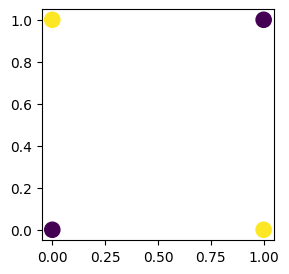

In [3]:
# Visualize the data:
plt.figure(figsize=(3, 3))
plt.scatter(X[0, :], X[1, :], marker='o', c = Y.T, s=120);

## Inicjalizacja parametrów dla sieci neuronowej z jedną warstwą ukrytą

W procesie budowy sieci neuronowych kluczowym krokiem jest inicjalizacja wag i biasów (przesunięć), które będą używane w trakcie uczenia modelu. Odpowiednia inicjalizacja parametrów może znacząco wpłynąć na szybkość i jakość uczenia się sieci. 

Poniżej przedstawiona jest funkcja `initialize_parameters`, która inicjalizuje wagi (`W1`, `W2`) oraz biasy (`b1`, `b2`) dla sieci neuronowej z jedną warstwą ukrytą. 

Argumenty wejściowe funkcji to:
- `n_x`: liczba jednostek wejściowych
- `n_h`: liczba jednostek w warstwie ukrytej
- `n_y`: liczba jednostek wyjściowych

Wartości `n_x` i `n_y` zależą od danych treningowych. `n_h` jest dowolne. Nasze dane treniongowe:
```python
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]

Y = [[0, 1, 1, 0]]
```

`X` to macierz cech o wymiarach `2x4`. Każda kolumna reprezentuje jeden przykład treningowy, a każdy wiersz reprezentuje jedną cechę. Wartość `n_x` odpowiada liczbie cech (wierszy) w `X`, co w tym przypadku wynosi `2`.

`n_h` to **hiperparametr**, który możemy dostosować w zależności od złożoności problemu i wymaganej mocy obliczeniowej. Przyjmiemy dalej, że `n_h = 4`.

`Y` to macierz wyjściowa o wymiarach `1x4`. Każda kolumna reprezentuje jeden przykład treningowy, a wiersz reprezentuje etykietę klasy. Wartość `n_y` odpowiada liczbie jednostek wyjściowych, co w tym przypadku wynosi `1`.

Podsumowanie:
- `n_x = 2` (liczba cech w danych wejściowych `X`)
- `n_h = 4` (liczba jednostek w warstwie ukrytej, wybrana jako hiperparametr)
- `n_y = 1` (liczba jednostek wyjściowych w `Y`)
Poniżej przedstawiono funkcję initialize_parameters, która wykorzystuje te wartości do inicjalizacji wag i biasów dla sieci neuronowej z jedną warstwą ukrytą.


Funkcja zwraca słownik zawierający zainicjalizowane parametry `W1`, `W2`, `b1` i `b2` z odpowiednimi wymiarami. Wszystkie wagi i biasy są inicjalizowane losowo z małymi wartościami, co pomaga w uniknięciu problemów związanych z symetrią w trakcie uczenia się modelu.

Poniżej znajduje się implementacja funkcji `initialize_parameters`.


In [4]:
from random import random

def initialize_parameters(n_x, n_h, n_y):
    """
    Implements the initialization of parameters

    Arguments:
    n_x - kształt wektora cech (input) = 2
    n_h - kształt warstwy ukrytej = 4
    n_y - kształt warstwy wyjściowej (output) = 1

    Returns:
    W1 - kształt macierzy (n_h,n_x)
    W2 - kształt macierzy (n_y,n_h)
    b1 - kształt macierzy (n_h,1)
    b2 - kształt macierzy (n_y,1)
    """    
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    W2 = np.random.randn(n_y,n_h) * 0.01
    
    b1 = np.random.randn(n_h,1) * 0.01
    b2 = np.random.randn(n_y,1) * 0.01    
    
    parameters = {"W1":W1,
                  "W2":W2,
                  "b1":b1,
                  "b2":b2}
    
    assert(W1.shape == (n_h,n_x))
    assert(W2.shape == (n_y,n_h))
    assert(b1.shape == (n_h,1))
    assert(b2.shape == (n_y,1))
    
    return parameters

In [5]:
n_x = X.shape[0]
n_h = 4
n_y = Y.shape[0]

parameters = initialize_parameters(n_x, n_h, n_y)

# Ładne wyświetlanie parametrów
pprint(parameters)

{'W1': array([[-0.01121789,  0.0157651 ],
       [-0.00637339,  0.0073928 ],
       [ 0.00925716,  0.00153088],
       [-0.00010538,  0.01116739]]),
 'W2': array([[ 0.00086165,  0.00454172, -0.00992926, -0.01049528]]),
 'b1': array([[0.00170728],
       [0.01969691],
       [0.00015369],
       [0.0061225 ]]),
 'b2': array([[0.00993431]])}


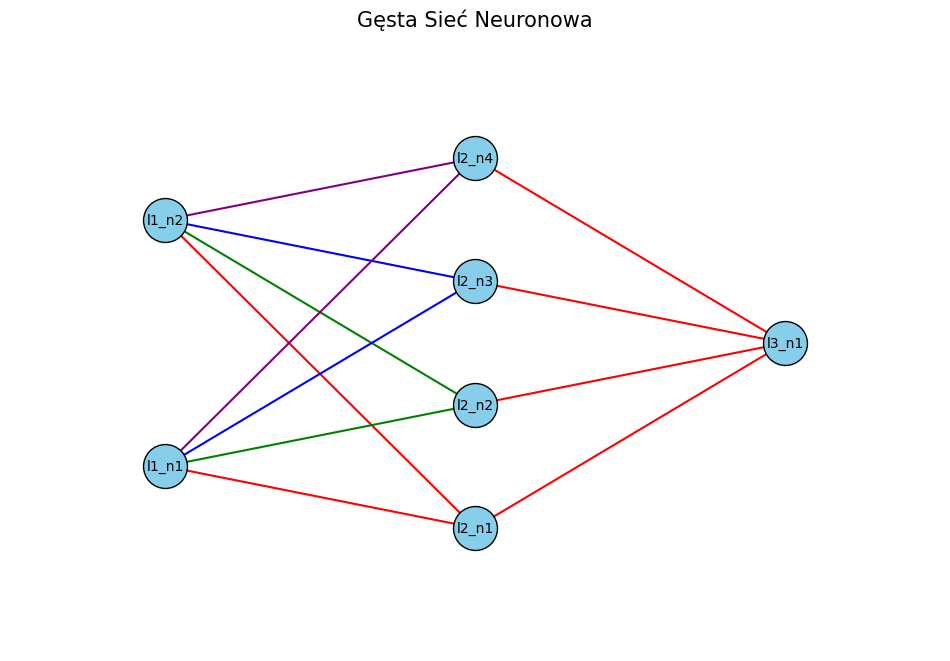

In [6]:
def draw_neural_network():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Definiowanie współrzędnych dla warstw
    layer_xs = [1, 2, 3]
    layer_ys = [
        [0.5, 2.5],  # Warstwa wejściowa między 1 i 2 oraz 3 i 4 w ukrytej
        [0, 1, 2, 3],  # Warstwa ukryta
        [1.5]  # Warstwa wyjściowa między 2 i 3 w ukrytej
    ]
    
    # Lista kolorów
    colors = ['red', 'green', 'blue', 'purple']

    # Rysowanie neuronów dla każdej warstwy
    for i, (x, ys) in enumerate(zip(layer_xs, layer_ys)):
        for j, y in enumerate(ys):
            ax.scatter(x, y, s=1000, zorder=3, color='skyblue', edgecolors='k')
            ax.text(x, y, f'l{i+1}_n{j+1}', ha='center', va='center', fontsize=10)

    # Rysowanie połączeń między neuronami
    for i, (x0, ys0, x1, ys1) in enumerate(zip(layer_xs[:-1], layer_ys[:-1], layer_xs[1:], layer_ys[1:])):
        for k, y1 in enumerate(ys1):
            color = colors[k % len(colors)]
            for y0 in ys0:
                ax.plot([x0, x1], [y0, y1], '-', zorder=1, color=color)

    # Ustawienia osi
    ax.axis('off')
    ax.set_xlim(0.5, 3.5)
    ax.set_ylim(-1, 4)

    plt.title("Gęsta Sieć Neuronowa", fontsize=15)
    plt.show()

draw_neural_network()

## Propagacja ,,do przodu"

### Sigmoid

In [7]:
# Definicja funkcji sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

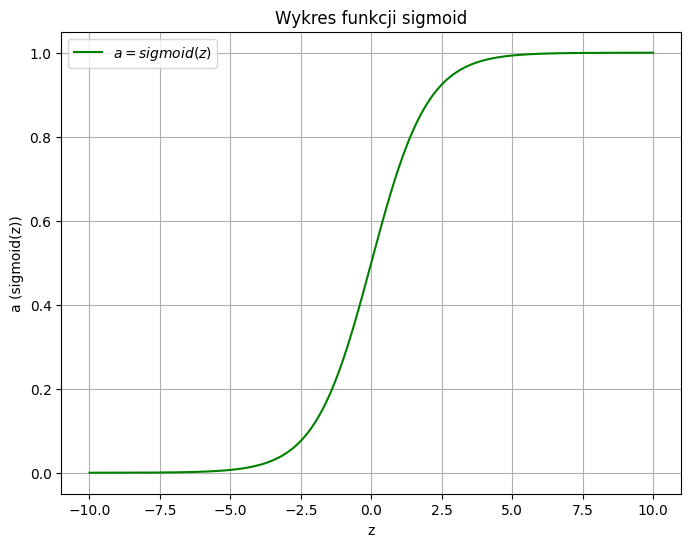

In [8]:
# Generowanie wartości z dla zakresu od -10 do 10
z_values = np.linspace(-10, 10, 400)
a_values = sigmoid(z_values)

# Tworzenie wykresu funkcji sigmoid
plt.figure(figsize=(8, 6))
plt.plot(z_values, a_values, label='$a = sigmoid(z)$', color='green')
plt.xlabel('z')
plt.ylabel('a (sigmoid(z))')
plt.title('Wykres funkcji sigmoid')
plt.legend()
plt.grid(True)

# Wyświetlanie wykresu
plt.show()

### Tangens hiperboliczny (tanh)

In [9]:
# Definicja funkcji tangens hiperboliczny
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

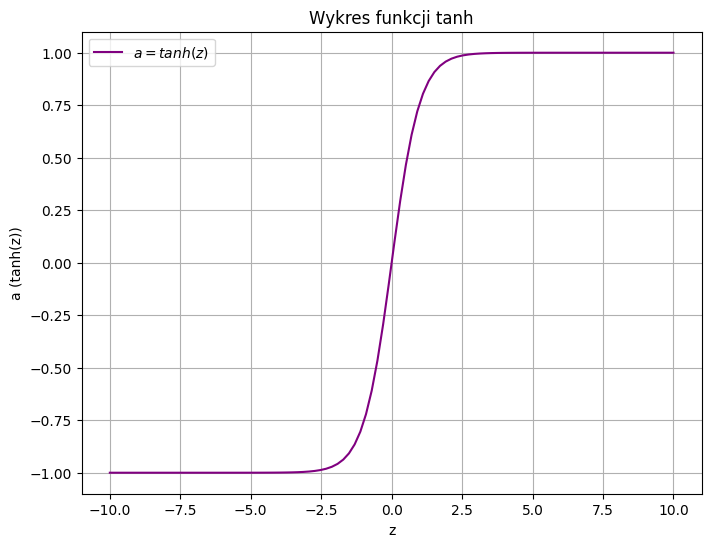

In [10]:
# Generowanie wartości z dla zakresu od -10 do 10
z_values = np.linspace(-10, 10, 100)
tanh_values = tanh(z_values)

# Tworzenie wykresu funkcji tanh
plt.figure(figsize=(8, 6))
plt.plot(z_values, tanh_values, label='$a = tanh(z)$', color='purple')
plt.xlabel('z')
plt.ylabel('a (tanh(z))')
plt.title('Wykres funkcji tanh')
plt.legend()
plt.grid(True)

# Wyświetlanie wykresu
plt.show()

In [11]:
pprint(f'Wartość funkcji sigmoid dla 0 = {sigmoid(0)}')
pprint(f'Wartość funkcji tanh    dla 0 = {tanh(0)}')
pprint(f'Wartość funkcji sigmoid dla [0,6] = {sigmoid(np.array([0,6]))}')
pprint(f'Wartość funkcji tanh    dla [0,6] = {tanh(np.array([0,6]))}')

'Wartość funkcji sigmoid dla 0 = 0.5'
'Wartość funkcji tanh    dla 0 = 0.0'
'Wartość funkcji sigmoid dla [0,6] = [0.5        0.99752738]'
'Wartość funkcji tanh    dla [0,6] = [0.         0.99998771]'


In [12]:
def weighted_sum(weights, bias, A): # A - aktywacja; X = A^0
       
    Z = np.dot(weights, A) + bias
    
    assert(Z.shape == (weights.shape[0], A.shape[1]))

    return Z

In [13]:
weights = parameters["W1"]
bias = parameters["b1"]
print("weights.shape =", weights.shape,'\n' 
      "X.shape =", X.shape,'\n' 
      "bias.shape =",bias.shape)

pprint(weighted_sum(weights, bias, X))

weights.shape = (4, 2) 
X.shape = (2, 4) 
bias.shape = (4, 1)
array([[ 0.00625449, -0.00951061,  0.01747239,  0.00170728],
       [ 0.02071632,  0.01332352,  0.02708972,  0.01969691],
       [ 0.01094173,  0.00941085,  0.00168457,  0.00015369],
       [ 0.0171845 ,  0.00601711,  0.01728989,  0.0061225 ]])


In [14]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = weighted_sum(W1, b1, X)   # preactiv X = A^0
    A1 = tanh(Z1)                   # tanh
    Z2 = weighted_sum(W2, b2, A1)  # preactiv
    A2 = sigmoid(Z2)                # sigmoid
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1":Z1,
             "Z2":Z2,
             "A1":A1,
             "A2":A2
            }
    
    return cache

In [15]:
cache = forward_propagation(X, parameters)

In [16]:
def predict(parameters, X, threshold = 0.5):
    
    A2 = forward_propagation(X, parameters)["A2"]
    
    predictions = np.where(A2 >= threshold, 1, 0)
    
    
    return predictions

In [17]:
predict(parameters, X)

array([[1, 1, 1, 1]])

## Funkcja straty (crossentropy function) dla jednego elementu ze zbioru treniongowego

$$L(a, y) = - \large{(} \small y\log\left(a\right) + (1-y)\log\left(1- a\right) \large{)} \small\tag{1}$$

$$a = sigmoid(z) = \frac{1}{1 + e^{(-z)}}$$

Interpretujemy $a$ jako pradopodobieństwo tego, że $y$ przyjmuje wartość 1, dla danych $x$: 
$$a = P(y=1|x)$$

- Jeśli $y = 1$, to $P(y|x) = a$
- Jeśli $y = 0$, to $P(y|x) = 1 - a$

Uwaga! W klasyfikacji binarnej $y\in\{0,1\}$.

$$P(y|x) = {a}^{y}(1-a)^{(1-y)}$$

(Sprawdź, że to poprawne fomuła przyjmując $y$ równe $1$, a następnie $0$.)

Funkcja logarytmiczna jest ściśle monotoniczna (tj. rosnąca). Więc zastosowana do $P(y|x)$ powinna dać oczekiwane rezultaty.

https://pl.wikipedia.org/wiki/Logarytm_naturalny#/media/Plik:Log.svg

$$log(P(y|x)) = log({a}^{y}(1-a)^{(1-y)}) = log({a}^{y}) + log((1-a)^{(1-y)}) = ylog({a}) + (1-y)log(1-a) = - L(a, y)$$


Procedura uczenia powinnawina dążyć do jak najmniejszej wartości $L(a, y)$. Wówczas:

- Jeśli $y = 1$, to $L(a, y) = - \small \log\left(a\right) $. 
    - $- \small \log\left(a\right) $ powinno być tak małe jak to możliwe.
    - $ \small \log\left(a\right) $ powinno być tak duże jak to możliwe.
    - $ \small a $ powinno być tak duże jak to możliwe, ale nie większe niż 1 (zauważ, że $a = sigmoid(z^{[2]})$, a więc nie może być większe od 1).
    
- Jeśli $y = 0$, to $L(a, y) = - \small \log\left(1-a\right) $. 
    - $- \small \log\left(1 - a\right) $ powinno być tak małe jak to możliwe.
    - $ \small \log\left(1 - a\right) $ powinno być tak duże jak to możliwe.
    - $ \small 1- a $ powinno być tak duże jak to możliwe, a zatem $ \small a $ powinno być tak małe jak to możilwe, ale nie mniejsze niż 0 (zauważ, że $a = sigmoid(z^{[2]})$, a więc nie może być mniejsze od 0).    

### Funkcja kosztu (crossentropy function) dla całego zbioru treniongowego

$$J(w,b) = \frac{1}{m} \sum\limits_{i = 1}^{m}  \small L(a^{(i)}, y^{(i)}) \small\tag{2}$$

$$J(w,b) = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{(i)}\right) + (1-y^{(i)})\log\left(1- a^{(i)}\right) \large{)} \small\tag{3}$$

$(i)$ - i-ty przykład ze zbioru treniongowego $X$

**Wyjaśnienie** Pradopodonieństwo dla wszystkich etykiet ze zbioru treniongowego (zakładając, że są one i.i.d, tj. *independent and identically distributed*) jest równe iloczynowi prawdopodobieństw dla każdego z nich z osobna. Maksymalizować to prawdopodobieństwo znaczy tyle samo co maksymalizować jego logarytm. Mamy więc ostatecznie sumę logarytmów prawdopodobieństw, czyli $\sum\limits_{i = 1}^{m}  \small L(a^{(i)}, y^{(i)}) \small$

[Estymacja metodą największej wiarygodności](http://wazniak.mimuw.edu.pl/index.php?title=Rachunek_prawdopodobie%C5%84stwa_i_statystyka/Wyk%C5%82ad_12:_Metoda_najwi%C4%99kszej_wiarygodno%C5%9Bci) pomaga nam wybrać parametry, które zmaksynalizują tę wartość.

Dzielenie przez $m$ dla lepszego skalowania.

### Dla sieci z jedną warstwą ukrytą

- $J(w^{[1]},b^{[1]},w^{[2]},b^{[2]}) = \frac{1}{m} \sum\limits_{i = 1}^{m}  \small L(a^{[2]}, y) \small$







## Funkcja Straty (Crossentropy Function) dla Jednego Elementu ze Zbioru Treningowego

$$
L(a, y) = - \left( y\log(a) + (1-y)\log(1-a) \right) \tag{1}
$$

$$
a = \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

Interpretujemy $a$ jako prawdopodobieństwo tego, że $y$ przyjmuje wartość 1 dla danych $x$:
$$
a = P(y=1|x)
$$

- Jeśli $y = 1$, to $P(y|x) = a$
- Jeśli $y = 0$, to $P(y|x) = 1 - a$

**Uwaga!** W klasyfikacji binarnej $y \in \{0,1\}$.

$$
P(y|x) = a^{y}(1-a)^{(1-y)}
$$

(Sprawdź poprawność tej formuły przyjmując $y$ równe $1$, a następnie $0$.)

Funkcja logarytmiczna jest ściśle monotoniczna (tj. rosnąca). Więc zastosowanie jej do $P(y|x)$ powinno dać oczekiwane rezultaty.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Log.svg/1200px-Log.svg.png" alt="Logarithm function">


$$
\log(P(y|x)) = \log(a^y(1-a)^{(1-y)}) = \log(a^y) + \log((1-a)^{(1-y)}) = y\log(a) + (1-y)\log(1-a) = -L(a, y)
$$

Procedura uczenia powinna dążyć do jak najmniejszej wartości $L(a, y)$. Wówczas:

- Jeśli $y = 1$, to $L(a, y) = -\log(a)$.
  - $-\log(a)$ powinno być tak małe, jak to możliwe.
  - $\log(a)$ powinno być tak duże, jak to możliwe.
  - $a$ powinno być tak duże, jak to możliwe, ale nie większe niż 1 (zauważ, że $a = \text{sigmoid}(z)$, więc nie może być większe od 1).

- Jeśli $y = 0$, to $L(a, y) = -\log(1-a)$.
  - $-\log(1-a)$ powinno być tak małe, jak to możliwe.
  - $\log(1-a)$ powinno być tak duże, jak to możliwe.
  - $1-a$ powinno być tak duże, jak to możliwe, a zatem $a$ powinno być tak małe, jak to możliwe, ale nie mniejsze niż 0 (zauważ, że $a = \text{sigmoid}(z)$, więc nie może być mniejsze od 0).

### Funkcja Kosztu (Crossentropy Function) dla Całego Zbioru Treningowego

$$
J(w, b) = \frac{1}{m} \sum\limits_{i=1}^{m} L(a^{(i)}, y^{(i)}) \tag{2}
$$

$$
J(w, b) = -\frac{1}{m} \sum\limits_{i=1}^{m} \left( y^{(i)}\log(a^{(i)}) + (1-y^{(i)})\log(1-a^{(i)}) \right) \tag{3}
$$

Gdzie $(i)$ oznacza i-ty przykład ze zbioru treningowego $X$.

**Wyjaśnienie**: Prawdopodobieństwo dla wszystkich etykiet ze zbioru treningowego (zakładając, że są one i.i.d, tj. *independent and identically distributed*) jest równe iloczynowi prawdopodobieństw dla każdego z nich z osobna. Maksymalizacja tego prawdopodobieństwa jest równoważna maksymalizacji jego logarytmu. Mamy więc ostatecznie sumę logarytmów prawdopodobieństw, czyli $\sum\limits_{i=1}^{m} L(a^{(i)}, y^{(i)})$.

[Estymacja metodą największej wiarygodności](http://wazniak.mimuw.edu.pl/index.php?title=Rachunek_prawdopodobie%C5%84stwa_i_statystyka/Wyk%C5%82ad_12:_Metoda_najwi%C4%99kszej_wiarygodno%C5%9Bci) pomaga nam wybrać parametry, które zmaksymalizują tę wartość.

Dzielenie przez $m$ dla lepszego skalowania.

### Dla Sieci z Jedną Warstwą Ukrytą

Załóżmy, że mamy sieć neuronową z jedną warstwą ukrytą. W takim przypadku mamy dwa zestawy wag i przesunięć:

- $w^{[1]}$ i $b^{[1]}$ dla warstwy ukrytej
- $w^{[2]}$ i $b^{[2]}$ dla warstwy wyjściowej


Niech $z^{[1]}$ i $a^{[1]}$ będą odpowiednio sumą ważoną i aktywacją dla warstwy ukrytej, a $z^{[2]}$ i $a^{[2]}$ dla warstwy wyjściowej.


#### 1. Obliczanie aktywacji warstwy ukrytej:

$$
z^{[1](i)} = w^{[1]} x^{(i)} + b^{[1]}
$$
$$
a^{[1](i)} = \sigma(z^{[1](i)})
$$
Gdzie $\sigma$ to funkcja aktywacji (np. sigmoid).

#### 2. Obliczanie aktywacji warstwy wyjściowej:
$$
z^{[2](i)} = w^{[2]} a^{[1](i)} + b^{[2]}
$$
$$
a^{[2](i)} = \sigma(z^{[2](i)})
$$

#### 3. Funkcja kosztu (crossentropy function) dla całego zbioru treningowego:
$$
J(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}) = -\frac{1}{m} \sum\limits_{i=1}^{m} \left( y^{(i)}\log(a^{[2](i)}) + (1-y^{(i)})\log(1-a^{[2](i)}) \right)
$$

Gdzie:
- $a^{[2](i)}$ to wyjście sieci neuronowej dla i-tego przykładu.
- $y^{(i)}$ to rzeczywista etykieta dla i-tego przykładu.


### Pełne równanie z podstawionymi wartościami:
$$
J(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}) = -\frac{1}{m} \sum\limits_{i=1}^{m} \left( y^{(i)}\log(\sigma(w^{[2]} a^{[1](i)} + b^{[2]})) + (1-y^{(i)})\log(1-\sigma(w^{[2]} a^{[1](i)} + b^{[2]})) \right)
$$

W tym równaniu:
- $a^{[1](i)} = \sigma(w^{[1]} x^{(i)} + b^{[1]})$ to aktywacja warstwy ukrytej dla i-tego przykładu.
- $\sigma$ to funkcja aktywacji (np. funkcja sigmoid).


### Wyjaśnienie:
1. **Forward Propagation**: Przechodzimy przez warstwy sieci, obliczając aktywacje dla warstwy ukrytej i wyjściowej.
2. **Funkcja Kosztu**: Funkcja cross-entropy mierzy różnicę między przewidywanym wynikiem a rzeczywistą etykietą dla całego zbioru treningowego.

To pełne rozwinięcie funkcji kosztu \(J\) dla sieci neuronowej z jedną warstwą ukrytą, uwzględniające wszystkie etapy forward propagation oraz wyznaczenie funkcji cross-entropy dla całego zbioru treningowego.


In [18]:
# Definicja funkcji straty cross-entropy
def cross_entropy_loss(a, y):
    return - (y * np.log(a) + (1 - y) * np.log(1 - a))

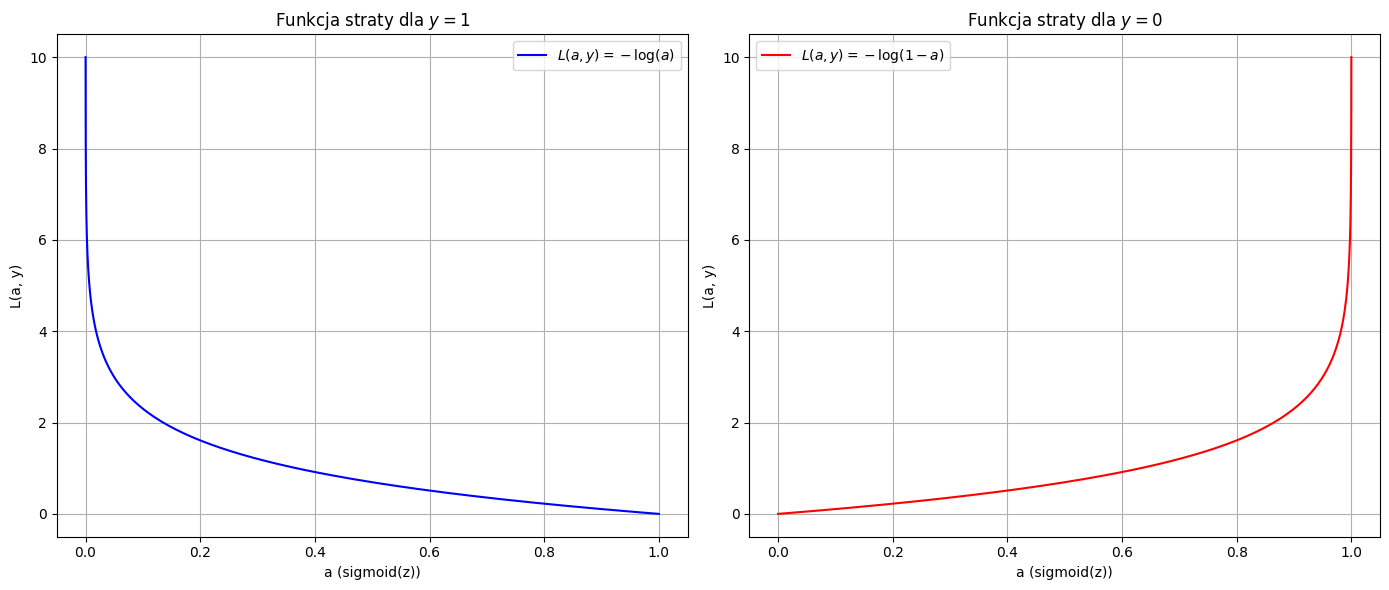

In [19]:
# Generowanie wartości z dla zakresu od -10 do 10
z_values = np.linspace(-10, 10, 400)
a_values = sigmoid(z_values)

# Obliczanie strat dla y = 1
loss_y1 = cross_entropy_loss(a_values, 1)

# Obliczanie strat dla y = 0
loss_y0 = cross_entropy_loss(a_values, 0)

# Tworzenie wykresów
plt.figure(figsize=(14, 6))

# Wykres dla y = 1
plt.subplot(1, 2, 1)
plt.plot(a_values, loss_y1, label='$L(a, y) = -\log(a)$', color='blue')
plt.xlabel('a (sigmoid(z))')
plt.ylabel('L(a, y)')
plt.title('Funkcja straty dla $y=1$')
plt.legend()
plt.grid(True)

# Wykres dla y = 0
plt.subplot(1, 2, 2)
plt.plot(a_values, loss_y0, label='$L(a, y) = -\log(1-a)$', color='red')
plt.xlabel('a (sigmoid(z))')
plt.ylabel('L(a, y)')
plt.title('Funkcja straty dla $y=0$')
plt.legend()
plt.grid(True)

# Wyświetlanie wykresów
plt.tight_layout()
plt.show()


In [21]:
print(Y)
A2 = forward_propagation(X, parameters)["A2"]
print(np.log(A2))

[[0 1 1 0]]
[[-0.68828665 -0.68824424 -0.68822227 -0.68817986]]


In [23]:
np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))

array([[-0.69803145, -0.68824424, -0.68822227, -0.6981393 ]])

In [24]:
cross_entropy_loss(A2, Y)

array([[0.69803145, 0.68824424, 0.68822227, 0.6981393 ]])

In [25]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
    cost =  - np.sum(logs) / m
    
    return cost

In [26]:
compute_cost(A2, Y)

0.6931593156701492

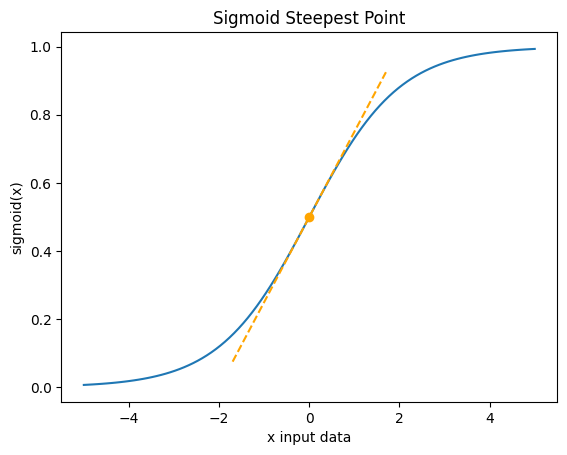

In [27]:
# Data
# Interval [-5, 5]
x = np.linspace(-5, 5, 100)  # try changing the range of values in the data. eg: (-100,100,1000)

# Activation
# Interval [0, 1]
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

activations = sigmoid(x)

# Gradient
# Interval [0, 0.25]
def sigmoid_gradient(x):
    return (x) * (1 - x)

gradients = sigmoid_gradient(activations)

# Plot sigmoid with tangent line
plt.plot(x, activations)
plt.title("Sigmoid Steepest Point")
plt.xlabel("x input data")
plt.ylabel("sigmoid(x)")

# Add the tangent line
x_tan = 0   # x value to find the tangent. try different values within x declared above. eg: 2  
y_tan = sigmoid(x_tan)  # y value
span = 1.7              # line span along x axis
data_tan = np.linspace(x_tan - span, x_tan + span)  # x values to plot
gradient_tan = sigmoid_gradient(sigmoid(x_tan))     # gradient of the tangent
tan = y_tan + gradient_tan * (data_tan - x_tan)     # y values to plot
plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)  # marker
plt.plot(data_tan, tan, linestyle="--", color="orange")         # line
plt.show()

## Propagacja ,,do tył''

### Gradient
$$L(a, y) = - \large{(} \small y\log\left(a\right) + (1-y)\log\left(1- a\right) \large{)} \small\tag{1}$$

1. $x_1, x_2, w_1, w_2, b$
2. $z = x_1w_1 + x_2w_2 + b$
3. $a = sigmoid(z)$
4. $L(a, y)$

- (4.) $\frac{dL(a,y)}{da} = - (\frac{y}{a} + \frac{1-y}{1-a})$
- (3.) $da = \frac{da}{dz} = a(1-a)$
- (3.) $dz = \frac{dL(a,y)}{dz} = \frac{dL(a,y)}{da} \frac{da}{dz} = a - y$
- (2.) $dw_1 = \frac{dL(a,y)}{dw_1} = x_1 dz$
- (2.) $dw_2 = \frac{dL(a,y)}{dw_2} = x_2 dz$
- (2.) $db = \frac{dL(a,y)}{db} = dz$


### Dla sieci z jedną warstwą ukrytą

- $J(w^{[1]},b^{[1]},w^{[2]},b^{[2]}) = \frac{1}{m} \sum\limits_{i = 1}^{m}  \small L(a^{[2]}, y) \small$

Kroki procesu dla jednego przykładu ze zbioru treningowego:
1. $x, w^{[1]}, b^{[1]}$
2. $z^{[1]} = w^{[1]}x + b^{[1]}$
3. $a^{[1]} = tanh(z^{[1]})$
4. $z^{[2]} = w^{[2]}a^{[1]} + b^{[2]}$ 
    - dla $w^{[2]}, b^{[2]}$
5. $a^{[2]} = sigmoid(z^{[2]})$
6. $L(a^{[2]},y)$

Teraz idąc od końca:
- (5.) $da^{[2]}$
- (4.) $dz^{[2]} = a^{[2]} - y$ 
- (4.) $dw^{[2]} = dz^{[2]}a^{[1]}.T$ 
- (4.) $db^{[2]} = dz^{[2]}$ 
- (3.) $da^{[1]} = 1 - {a^{[1]}}^2$
- (2.) $dz^{[1]} = w^{[2]}.T dz^{[2]} * da^{[1]}$ 
- (1.) $dw^{[1]} = dz^{[1]}x.T$ 
- (1.) $db^{[1]} = dz^{[1]}$ 

<img src="grad_summary.png" style="width:600px;height:300px;">


### Gradient

$$
L(a, y) = - \left( y\log(a) + (1-y)\log(1-a) \right) \tag{1}
$$

1. $x_1, x_2, w_1, w_2, b$
2. $z = x_1w_1 + x_2w_2 + b$
3. $a = \text{sigmoid}(z)$
4. $L(a, y)$

Aby wyznaczyć gradienty, stosujemy regułę łańcuchową, krok po kroku:

1. **Obliczenie pochodnej funkcji straty w stosunku do $a$:**
   $$
   \frac{dL(a,y)}{da} = - \left( \frac{y}{a} - \frac{1-y}{1-a} \right)
   $$

2. **Obliczenie pochodnej funkcji aktywacji sigmoid w stosunku do $z$:**
   $$
   \frac{da}{dz} = a(1-a)
   $$

3. **Obliczenie pochodnej funkcji straty w stosunku do $z$:**
   $$
   \frac{dL(a,y)}{dz} = \frac{dL(a,y)}{da} \cdot \frac{da}{dz} = (a - y)
   $$

4. **Obliczenie gradientów wag i przesunięcia:**
   $$
   \frac{dL(a,y)}{dw_1} = x_1 \cdot \frac{dL(a,y)}{dz} = x_1 \cdot (a - y)
   $$
   $$
   \frac{dL(a,y)}{dw_2} = x_2 \cdot \frac{dL(a,y)}{dz} = x_2 \cdot (a - y)
   $$
   $$
   \frac{dL(a,y)}{db} = \frac{dL(a,y)}{dz} = (a - y)
   $$

### Dla Sieci z Jedną Warstwą Ukrytą

$$
J(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}) = \frac{1}{m} \sum\limits_{i=1}^{m} L(a^{[2](i)}, y^{(i)})
$$

Kroki procesu dla jednego przykładu ze zbioru treningowego:

1. **Forward Propagation:**
   - **Wejście do warstwy ukrytej:**
     $$
     x, w^{[1]}, b^{[1]}
     $$
     $$
     z^{[1]} = w^{[1]}x + b^{[1]}
     $$
     $$
     a^{[1]} = \text{tanh}(z^{[1]})
     $$

   - **Wejście do warstwy wyjściowej:**
     $$
     z^{[2]} = w^{[2]}a^{[1]} + b^{[2]}
     $$
     $$
     a^{[2]} = \text{sigmoid}(z^{[2]})
     $$
     $$
     L(a^{[2]}, y)
     $$

2. **Backward Propagation:**
   - **Wyjście warstwy wyjściowej:**
   
     $$
     \frac{dL}{da^{[2]}} = - \left(\frac{y}{a^{[2]}} - \frac{1-y}{1-a^{[2]}} \right)
     $$
     
     $$
     dz^{[2]} = a^{[2]} - y
     $$
     $$
     dw^{[2]} = dz^{[2]} \cdot (a^{[1]})^T
     $$
     $$
     db^{[2]} = dz^{[2]}
     $$

   - **Warstwa ukryta:**
   
     $$
     da^{[1]} = w^{[2]}^T \cdot dz^{[2]}
     $$
     
     $$
     dz^{[1]} = da^{[1]} \cdot (1 - (a^{[1]})^2)
     $$
     $$
     dw^{[1]} = dz^{[1]} \cdot x^T
     $$
     $$
     db^{[1]} = dz^{[1]}
     $$

### Wyjaśnienie Wyliczania Gradientu

1. **Forward Propagation:**
   - Przechodzimy przez warstwy sieci, obliczając sumy ważone ($z$) oraz aktywacje ($a$) dla każdej warstwy.

2. **Backward Propagation:**
   - Zaczynamy od końca, od funkcji straty, i obliczamy gradienty wstecznie.
   - Najpierw obliczamy gradienty dla warstwy wyjściowej: pochodna funkcji straty w stosunku do wyjścia sieci, sumy ważonej, wag oraz przesunięć.
   - Następnie, przechodzimy do warstwy ukrytej, obliczając pochodne w stosunku do aktywacji, sumy ważonej, wag oraz przesunięć dla tej warstwy.

3. **Aktualizacja wag i przesunięć:**
   - Używając obliczonych gradientów, aktualizujemy wagi i przesunięcia w kierunku przeciwnym do gradientu, co minimalizuje funkcję kosztu.


In [28]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
        
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims=True) / m
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = np.dot(dZ1,X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims=True) / m
    
    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}
    
    return grads

In [29]:
backward_propagation(parameters, cache, X, Y)

{'dW1': array([[ 1.05961807e-06,  1.08501468e-06],
        [ 5.41192662e-06,  5.73855078e-06],
        [-1.21076898e-05, -1.20292257e-05],
        [-1.24981349e-05, -1.28700083e-05]]),
 'db1': array([[ 2.16011024e-06],
        [ 1.12348717e-05],
        [-2.44193945e-05],
        [-2.58487466e-05]]),
 'dW2': array([[9.98670926e-06, 5.00111516e-05, 1.35609359e-05, 2.86452686e-05]]),
 'db2': array([[0.00246301]])}

In [30]:
def update(parameters, grads, learning_rate = 1):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1":W1,
                  "W2":W2,
                  "b1":b1,
                  "b2":b2}
    
    return parameters

## Model

In [31]:
def model(X, Y, n_h, number_iterations, learning_rate = 1):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(number_iterations):
        
        cache = forward_propagation(X, parameters)
        
#         cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update(parameters, grads, learning_rate)
    
    
    return parameters
    
    

In [59]:
final_parameters = model(X, Y, 
                         n_h=4, 
                         number_iterations=23000, 
                         learning_rate = 1.3)

predict(final_parameters, X)

array([[0, 1, 1, 0]])

In [62]:
pprint(final_parameters)

{'W1': array([[-3.94497804,  4.49573298],
       [-3.4683036 ,  2.75848497],
       [ 3.54840157, -2.84799359],
       [ 1.79477471,  1.7142945 ]]),
 'W2': array([[-8.77545774,  4.49553139, -4.74271329,  4.09776958]]),
 'b1': array([[ 1.77276723],
       [-1.20837625],
       [ 1.25658942],
       [ 0.21504287]]),
 'b2': array([[5.01082446]])}


In [105]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.02
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    print(np.c_[xx.ravel(), yy.ravel()].shape)
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z[0,:])

    
    # Plot the contour and training examples
    plt.figure(figsize=(3, 3))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], marker='o', c = y.T, s=120)

(22500, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


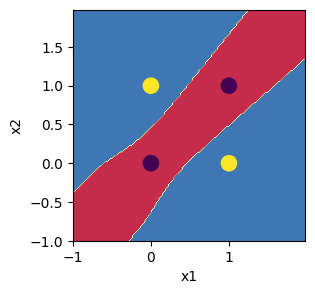

In [106]:
plot_decision_boundary(lambda x: predict(final_parameters,x.T), X, Y)

In [80]:
R = [[0.1, 1.5, 0, 0, 4],
     [1, 0, 1, 0, 5]]
R = np.array(R)
predict(final_parameters, R)

array([[1, 1, 1, 0, 0]])